In [1]:
import numpy as np
import pandas as pd
import statistics
import math
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import table 

In [2]:
pd.set_option('display.max_colwidth', -1)

In [3]:
train_limpio = pd.read_csv("data/train_limpio.csv",encoding = "ISO-8859-1")
train_limpio.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


In [4]:
train = pd.read_csv("data/train.csv",encoding = "ISO-8859-1")
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


In [5]:
df = train_limpio.iloc[1:5]
df.head()

,id,keyword,location,text,target
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


# Analisis preliminar: LINK

## Analisis de las distintas longitudes de Link

In [6]:
longitud_por_link = train
longitud_por_link['longitud link'] = longitud_por_link['text'].str.split('http').str.get(1)#me quedo con todo a partir de http
longitud_por_link['longitud link'] = longitud_por_link['longitud link'].str.split(' ').str.get(0).str.len()+4# desde http hasta un espacio
longitud_por_link['longitud link'] = longitud_por_link['longitud link'].fillna(0)
longitud_por_link['tiene link'] = longitud_por_link['text'].str.contains('http')
longitud_por_link

,id,keyword,location,text,target,longitud link,tiene link
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,0.0,False
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,0.0,False
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,0.0,False
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1,0.0,False
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,0.0,False
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires,1,0.0,False
6,10,NaN,NaN,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",1,0.0,False
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in the woods...,1,0.0,False
8,14,NaN,NaN,There's an emergency evacuation happening now in the building across the street,1,0.0,False
9,15,NaN,NaN,I'm afraid that the tornado is coming to our area...,1,0.0,False


In [8]:
longitud_por_link['longitud link'] = ((longitud_por_link['longitud link']/10).round(0).astype('int64'))*10
longitudes_de_links = longitud_por_link.groupby('longitud link').agg({'tiene link':'count'})

longitudes_de_links

,tiene link
longitud link,
0,3643
10,1
20,3924
30,29
40,8
50,1
90,7


<BarContainer object of 7 artists>

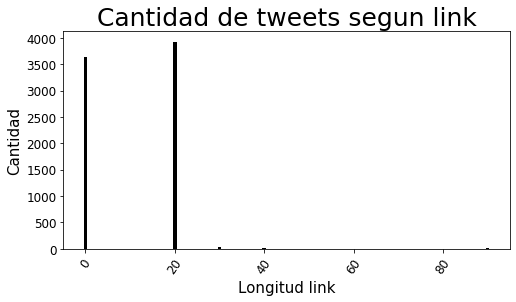

In [9]:
# Variables a graficar
x = longitudes_de_links.index
y = longitudes_de_links['tiene link']

# Tamaño del gráfico
fig = plt.figure(figsize = (8, 4))
ax = fig.add_subplot(111)
ax.set_aspect('auto')


# Tamaño de los títulos de los ejes
plt.xlabel("Longitud link", fontsize = 15);
plt.ylabel("Cantidad", fontsize = 15);

# Título
plt.title("Cantidad de tweets segun link", fontsize = 25)

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 12)
plt.tick_params(axis='both', which='minor', labelsize = 12)

# Rotar ejes
plt.xticks(rotation = 55)

# Límites para cada coordenada

# Tipo de gráficok
#plt.ylim(0, 0.7)
plt.bar(x, y, color = 'black')
# osea... la mayoria de las URL miden unos 20 caracteres, graficas eso

 ## promedio de URL segun longitud del tweet (sin considerar la longitud de la URL)

In [11]:
longitud_por_link['longitud tweet'] = longitud_por_link['text'].str.len() - longitud_por_link['longitud link']
longitud_por_link['longitud tweet'] = ((longitud_por_link['longitud tweet']/10).round(0).astype('int64'))*10
longitud_por_link['tiene link'] = (longitud_por_link['text'].str.contains('http') | longitud_por_link['text'].str.contains('www'))
longitud_por_link.head()

,id,keyword,location,text,target,longitud link,tiene link,longitud tweet
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,0,False,70
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,0,False,40
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,0,False,130
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1,0,False,60
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,0,False,90


In [12]:
longitud_tweet_link = longitud_por_link.groupby('longitud tweet').agg({'tiene link':['mean','count']})
longitud_tweet_link.columns = ['promedio','cantidad']
longitud_tweet_link

,promedio,cantidad
longitud tweet,,
10,0.307692,39
20,0.269737,152
30,0.291339,254
40,0.336815,383
50,0.433735,415
60,0.562102,628
70,0.622705,599
80,0.602151,744
90,0.611807,559


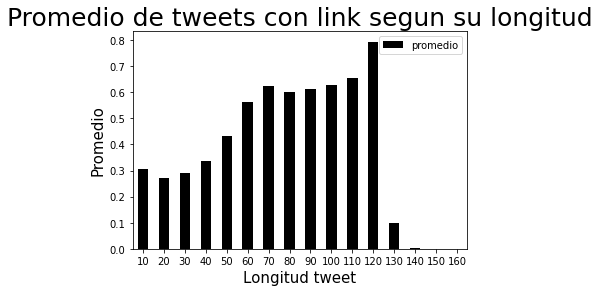

In [13]:
ax = longitud_tweet_link.plot.bar(y='promedio', rot=0, color = 'black')
plt.title("Promedio de tweets con link segun su longitud", fontsize = 25)
plt.xlabel("Longitud tweet", fontsize = 15);
plt.ylabel("Promedio", fontsize = 15);

#Entre más largo es el tweet,sin tener en cuenta la longitud de la misma URL, 
# mas probable es que tenga una URL, aunque esto decaiga rapidamente a partir 
# de los tweets mas largos, es porque hay menos de ellos

# Proporcion:cuantos tweets tienen 0 links, cuantos 1, cuantos 2,etc...

In [14]:
longitud_por_link['cantidad de links'] = longitud_por_link['text'].str.count('http')

In [15]:
longitud_por_link[longitud_por_link['cantidad de links']==4]

,id,keyword,location,text,target,longitud link,tiene link,longitud tweet,cantidad de links
40,59,ablaze,Live On Webcam,Check these out: http://t.co/rOI2NSmEJJ http://t.co/3Tj8ZjiN21 http://t.co/YDUiXEfIpE http://t.co/LxTjc87KLS #nsfw,0,20,True,90,4
48,68,ablaze,Live On Webcam,Check these out: http://t.co/rOI2NSmEJJ http://t.co/3Tj8ZjiN21 http://t.co/YDUiXEfIpE http://t.co/LxTjc87KLS #nsfw,0,20,True,90,4
7082,10143,upheaval,Attock,Ancient Mayan Tablet found via http://t.co/LmUMzkLtln http://t.co/yebxxAryBF http://t.co/SRRUqfffr6 http://t.co/CadzxAgMSI,0,20,True,100,4


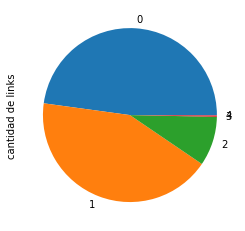

In [16]:
#longitud_por_URL.plot.pie(y='cantidad de URL', figsize=(5, 5))
longitud_por_link['cantidad de links'].value_counts().plot(kind='pie')

# Las palabras mas comunes de las noticias y su correspondiente target

In [28]:
from itertools import chain

In [29]:
lens = train_limpio['text'].str.split(' ').map(len)
lens

0       13
1       7 
2       22
3       9 
4       17
        ..
6984    13
6985    20
6986    19
6987    26
6988    20
Name: text, Length: 6989, dtype: int64

In [29]:
res = pd.DataFrame({'id': np.repeat(train_limpio['id'], lens),
                    'keyword': np.repeat(train_limpio['keyword'], lens),
                    'location': np.repeat(train_limpio['location'], lens),
                    'text': np.repeat(train_limpio['text'], lens),
                    'target': np.repeat(train_limpio['target'], lens)
                   }).reset_index()

In [30]:
res.head(60)

,index,id,keyword,location,text,target
0,0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
2,0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
3,0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
4,0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
5,0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
6,0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
7,0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
8,0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
9,0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1


In [76]:
len(res)

104199

In [77]:
#no hacerlo,tara muchísimo, ya guarde el dataframe editado mas abajo
id_actual = 0
posicion_actual = 0
palabras = 0
for i in range (len(res)):
    current_id = res.loc[i,'id']
    if(id_actual !=current_id):
        posicion_actual = 0
        palabras = list((res.loc[i,'text'].split(' ')))
        id_actual = current_id
    else:
        posicion_actual = posicion_actual + 1
    res.loc[i,'text'] = palabras[posicion_actual]

In [78]:
res.head(100)

,index,id,keyword,location,text,target
0,0,1,NaN,NaN,Our,1
1,0,1,NaN,NaN,Deeds,1
2,0,1,NaN,NaN,are,1
3,0,1,NaN,NaN,the,1
4,0,1,NaN,NaN,Reason,1
5,0,1,NaN,NaN,of,1
6,0,1,NaN,NaN,this,1
7,0,1,NaN,NaN,#earthquake,1
8,0,1,NaN,NaN,May,1
9,0,1,NaN,NaN,ALLAH,1


In [88]:
res['text'] = res['text'].map(lambda x: x.lstrip('#').rstrip(',')).map(lambda x: (x.lower()))

In [89]:
res.head(100)

,index,id,keyword,location,text,target
0,0,1,NaN,NaN,our,1
1,0,1,NaN,NaN,deeds,1
2,0,1,NaN,NaN,are,1
3,0,1,NaN,NaN,the,1
4,0,1,NaN,NaN,reason,1
5,0,1,NaN,NaN,of,1
6,0,1,NaN,NaN,this,1
7,0,1,NaN,NaN,earthquake,1
8,0,1,NaN,NaN,may,1
9,0,1,NaN,NaN,allah,1


In [3]:
res.to_csv('data/train_una_palabra_por_fila.csv', index=False)

NameError: name 'res' is not defined

In [26]:
palabra_por_fila = pd.read_csv("data/train_una_palabra_por_fila.csv",encoding = "ISO-8859-1")
palabra_por_fila.head(6)

,index,id,keyword,location,text,target
0,0,1,NaN,NaN,our,1
1,0,1,NaN,NaN,deeds,1
2,0,1,NaN,NaN,are,1
3,0,1,NaN,NaN,the,1
4,0,1,NaN,NaN,reason,1
5,0,1,NaN,NaN,of,1


In [27]:
# elimino estos tipos de palabras que no aportan informacion
prepositions = ['of','if', 'with', 'at', 'from', 'into','during','including','until','among','throughout','despite','towards','upon','concerning','to','in','for','on','by','about','like','through','over','before','between','after','since','without','under','within','along','following','across','behind','beyond','plus','except','but','up','out','around','down','off','above','near']
connectors = ['and', 'plus', 'furthermore', 'moreover', 'in addition', 'also', 'as well as','when', 'while', 'as', 'as soon as', 'then', 'after', 'afterwards', 'next', 'firstly', 'secondly', 'finally',  'but', 'however', 'though', 'although', 'nevertheless', 'despite', 'whereas', 'while', 'unless', 'otherwise','because', 'as', 'due to', 'so', 'in order to', 'so', 'therefore', 'as a result', 'consequently']
subjects = ['the','a','and','that','it','this','be','was','are','have','just','so','not','as','will','when','an','has','no','why','first','see','were','their','go','them','last']

In [28]:
palabra_por_fila = palabra_por_fila[~( (palabra_por_fila['text'].isin(prepositions)) | (palabra_por_fila['text'].isin(connectors)) | (palabra_por_fila['text'].isin(subjects)))]

In [29]:
#primero las agrupo por cada twit,mismo id, así si una palabra 
#aparece varias veces en un mismo twit, solo la cuento una.
palabra_por_mencion = palabra_por_fila.groupby(['id','text']).target.mean().to_frame().reset_index()
palabra_por_mencion.head()

,id,text,target
0,1,all,1
1,1,allah,1
2,1,deeds,1
3,1,earthquake,1
4,1,forgive,1


In [30]:
palabra_por_mencion = palabra_por_mencion.groupby('text').agg({'target':['mean','count']})
palabra_por_mencion.columns=['target mean','target count']
palabra_por_mencion.head()

,target mean,target count
text,,
\n,0.5,32
\n\n,0.0,3
\n\n#mtvsummerstar,0.0,1
\n\n#rt,0.0,1
\n\n+,1.0,1


In [31]:
palabra_por_mencion.shape

(22889, 2)

### examinamos las palabras mas asociadas a noticias verdaderas  y falsas que hayan aparecido varias veces

In [32]:
# noticias verdaderas
palabras_mas_veridicas = palabra_por_mencion[(palabra_por_mencion['target count']>50)].nlargest(20,'target mean').reset_index()
palabras_mas_veridicas.head(30)

,text,target mean,target count
0,hiroshima,0.984615,65
1,bombing,0.964912,57
2,killed,0.959459,74
3,california,0.942029,69
4,suicide,0.929412,85
5,fires,0.820896,67
6,forest,0.807692,52
7,train,0.805970,67
8,accident,0.787879,66
9,disaster,0.733333,90


<BarContainer object of 20 artists>

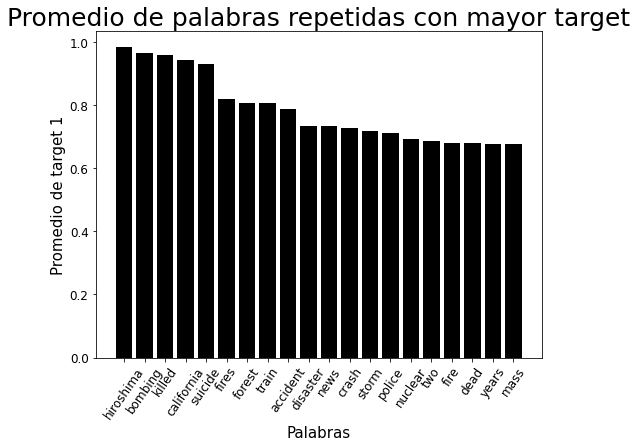

In [33]:
# Variables a graficar
x = palabras_mas_veridicas['text']
y = palabras_mas_veridicas['target mean']

# Tamaño del gráfico
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111)
ax.set_aspect('auto')


# Tamaño de los títulos de los ejes
plt.xlabel("Palabras", fontsize = 15);
plt.ylabel("Promedio de target 1", fontsize = 15);

# Título
plt.title("Promedio de palabras repetidas con mayor target", fontsize = 25)

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 12)
plt.tick_params(axis='both', which='minor', labelsize = 12)

# Rotar ejes
plt.xticks(rotation = 55)

# Límites para cada coordenada

# Tipo de gráficok
plt.bar(x, y, color = 'black')


### Los twits tienen mayor probabilidad de ser verdaderos cuando tienen esas palabras, tiene sentido porque estas son mas usadas en noticias que en otras conversaciones

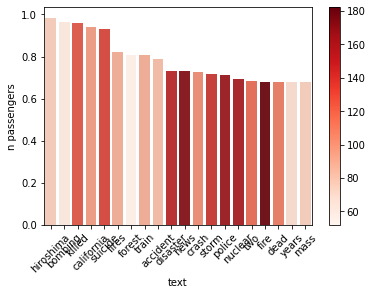

In [39]:
#no voy a usar este gráfico pero lo dejo xq va a servir mas adelante
norm = plt.Normalize(palabras_mas_veridicas['target count'].min(), palabras_mas_veridicas['target count'].max())
sm = plt.cm.ScalarMappable(cmap="Reds", norm=norm)
sm.set_array([])
ax = sns.barplot(x=palabras_mas_veridicas['text'], y=palabras_mas_veridicas['target mean'], hue=palabras_mas_veridicas['target count'], palette='Reds', 
                 dodge=False)
ax.set_ylabel('n passengers')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.get_legend().remove()
ax.figure.colorbar(sm)
plt.show()

In [40]:
# noticias verdaderas
palabras_menos_veridicas = palabra_por_mencion[(palabra_por_mencion['target count']>50)].nsmallest(20,'target mean').reset_index()
palabras_menos_veridicas.head(30)

,text,target mean,target count
0,full,0.074074,54
1,you're,0.090909,55
2,body,0.100917,109
3,love,0.125000,88
4,lol,0.127273,55
5,let,0.129630,54
6,want,0.152778,72
7,??????,0.166667,54
8,you,0.172174,575
9,i'm,0.173077,208


<BarContainer object of 20 artists>

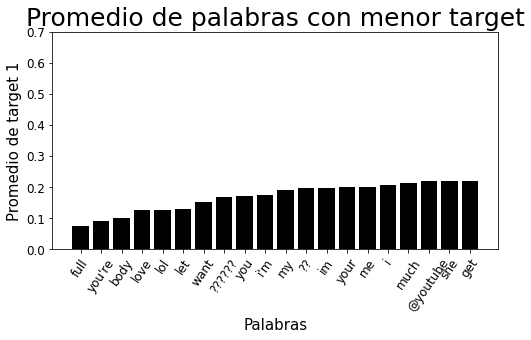

In [41]:
# Variables a graficar
x = palabras_menos_veridicas['text']
y = palabras_menos_veridicas['target mean']

# Tamaño del gráfico
fig = plt.figure(figsize = (8, 4))
ax = fig.add_subplot(111)
ax.set_aspect('auto')


# Tamaño de los títulos de los ejes
plt.xlabel("Palabras", fontsize = 15);
plt.ylabel("Promedio de target 1", fontsize = 15);

# Título
plt.title("Promedio de palabras con menor target", fontsize = 25)

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 12)
plt.tick_params(axis='both', which='minor', labelsize = 12)

# Rotar ejes
plt.xticks(rotation = 55)

# Límites para cada coordenada

# Tipo de gráficok
plt.ylim(0, 0.7)
plt.bar(x, y, color = 'black')

### Dejando de lado palabras como "body","let","want",etc, la precencia de pronombres personales indica mayor probabilidad de que el tweet sea falso ya que los mismos no se usan en noticias, como "you re","you","i'm","my","me","i"

# Y si los twits repetidos tienden a ser mas ciertos, ya que la gente suele compartir la misma noticia? (para éste uso el target sin limpiar porque dependo de las repeticiones)

In [50]:
tweets_repetidos = train
tweets_repetidos.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


In [52]:
tweets_repetidos['text'] = tweets_repetidos['text'].replace(r'http\S+', '', regex=True)
tweets_repetidos = tweets_repetidos.groupby('text').agg({'target':['mean','count']})
tweets_repetidos.columns = ['target','repeticiones del tweet']
tweets_repetidos.head()

,target,repeticiones del tweet
text,,
\nANOTHER DISASTER WAITING TO HAPPEN AND YOUR ALLOWING IT???,1.0,1
\nCROYDON RIOTS- The Next Day: Burning Buildings in High Street &amp; crowds at Reeves Corner\nCroydonization\nAugust 2011,1.0,1
\nSON OF SAVIOR LAVA VIDEO,0.0,1
\nSeems they declared war against government..,1.0,1
Cindy Noonan@CindyNoonan-Heartbreak in #Baltimore #Rioting #YAHIstorical #UndergroundRailraod,0.5,2


In [53]:
tweets_repetidos.nlargest(40,'repeticiones del tweet')

,target,repeticiones del tweet
text,,
Watch This Airport Get Swallowed Up By A Sandstorm In Under A Minute,1.000000,24
Wreckage 'Conclusively Confirmed' as From MH370: Malaysia PM: Investigators and the families of those who were...,1.000000,20
Families to sue over Legionnaires: More than 40 families affected by the fatal outbreak of Legionnaires' disea...,1.000000,19
#hot Funtenna: hijacking computers to send data as sound waves [Black Hat 2015] #prebreak #best,0.294118,17
Christian Attacked by Muslims at the Temple Mount after Waving Israeli Flag via Pamela Geller - ...,1.000000,15
Obama Declares Disaster for Typhoon-Devastated Saipan: Obama signs disaster declaration for Northern Marians a...,1.000000,13
The Latest: More Homes Razed by Northern California Wildfire - ABC News,1.000000,13
11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-old boy has been charged with manslaughter over the fatal sh...,1.000000,10
70 Years After Atomic Bombs Japan Still Struggles With War Past: The anniversary of the devastation wrought b...,1.000000,9


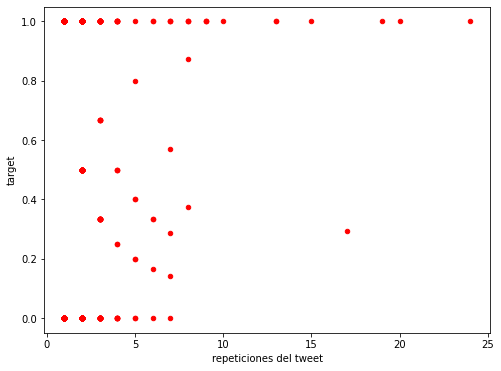

In [54]:
tweets_repetidos.plot.scatter('repeticiones del tweet','target',figsize=(8,6),color = 'red')

In [55]:
cantidad_repeticiones = tweets_repetidos.groupby(['target','repeticiones del tweet']).agg({'target':'count'})
cantidad_repeticiones.columns = ['cantidad']
cantidad_repeticiones = cantidad_repeticiones.reset_index()
cantidad_repeticiones = cantidad_repeticiones[cantidad_repeticiones['repeticiones del tweet']>3]
cantidad_repeticiones.head()

,target,repeticiones del tweet,cantidad
3,0.000000,4,6
4,0.000000,5,2
5,0.000000,6,1
6,0.000000,7,1
7,0.142857,7,1


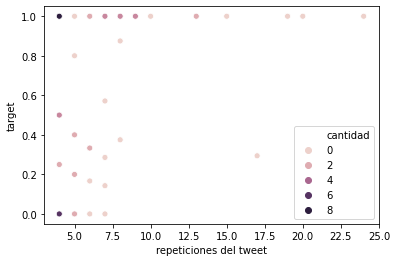

In [56]:
sns.scatterplot(x='repeticiones del tweet', y='target', data=cantidad_repeticiones, marker='o', color='red',hue = 'cantidad')

# Se puede ver, entonces, que cuando un twitt se repite varias veces,sucede porque es una noticia y por lo tanto varias personas publican, o comparten, lo mismo
#### (para este mejor usar el gráfico rojo, el otro quedó re mal)

### Hasta ahora, y quizá una podria ser una conclusion, se ve que el target no determina si una noticia es falsa o cierta, sino que determina si un tweet es una noticia o no.

## Los tweets que tienen mas datos (locacion y keyword) tienen mas chances de ser ciertos?

In [152]:
location_y_keyword = train_limpio.drop(columns=['text'])
location_y_keyword['tiene location'] = ~(train_limpio['location'].isnull())
location_y_keyword['tiene keyword'] = ~(train_limpio['keyword'].isnull())

In [153]:
location_y_keyword.head()

,id,keyword,location,target,longitud tweet,tiene location,tiene keyword
0,1,NaN,NaN,1,70,False,False
1,4,NaN,NaN,1,40,False,False
2,5,NaN,NaN,1,130,False,False
3,6,NaN,NaN,1,60,False,False
4,7,NaN,NaN,1,90,False,False


In [154]:
target_location_y_keyword = location_y_keyword.groupby(['tiene keyword','tiene location']).agg({'target': 'mean'})
target_location_y_keyword = target_location_y_keyword.unstack()
target_location_y_keyword.columns = target_location_y_keyword.columns.droplevel()
target_location_y_keyword.columns = ['No tiene Location','Tiene Location']
target_location_y_keyword.index = ['No tiene Keyword','Tiene Keyword']
target_location_y_keyword

,No tiene Location,Tiene Location
No tiene Keyword,0.641509,NaN
Tiene Keyword,0.389086,0.412217


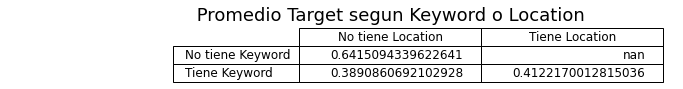

In [207]:
fig, ax = plt.subplots(figsize=(12, 1)) # set size frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
ax.set_frame_on(False)  # no visible frame, uncomment if size is ok
ax.set_title('                 Promedio Target segun Keyword o Location',size=18)
tabla = table(ax, target_location_y_keyword, loc='upper right', colWidths=[0.17]*len(target_location_y_keyword.columns))  # where df is your data frame
tabla.auto_set_font_size(True) # Activate set fontsize manually
tabla.set_fontsize(12) # if ++fontsize is necessary ++colWidths
tabla.scale(1.6, 1.5) # change size table
plt.savefig('table.png', transparent=True)

In [203]:
cantidad_location_y_keyword = location_y_keyword.groupby(['tiene keyword','tiene location']).agg({'target': 'count'})
cantidad_location_y_keyword = cantidad_location_y_keyword.unstack()
cantidad_location_y_keyword.columns = cantidad_location_y_keyword.columns.droplevel()
cantidad_location_y_keyword.columns = ['No tiene Location','Tiene Location']
cantidad_location_y_keyword.index = ['No tiene Keyword','Tiene Keyword']
cantidad_location_y_keyword

,No tiene Location,Tiene Location
No tiene Keyword,53.0,NaN
Tiene Keyword,2254.0,4682.0


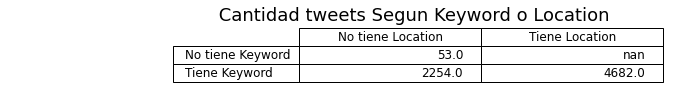

In [211]:
fig, ax = plt.subplots(figsize=(12, 1)) # set size frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
ax.set_frame_on(False)  # no visible frame, uncomment if size is ok
ax.set_title('                         Cantidad tweets Segun Keyword o Location',size=18)
tabla = table(ax, cantidad_location_y_keyword, loc='upper right', colWidths=[0.17]*len(cantidad_location_y_keyword.columns))  # where df is your data frame
tabla.auto_set_font_size(True) # Activate set fontsize manually
tabla.set_fontsize(12) # if ++fontsize is necessary ++colWidths
tabla.scale(1.6, 1.5) # change size table
plt.savefig('table.png', transparent=True)

In [60]:
location_y_keyword[~location_y_keyword['tiene keyword'] & location_y_keyword['tiene location']]

,id,keyword,location,target,signos de pregunta,tiene location,tiene keyword


## No, no los tienen, sin embargo que nota que hay mucho mayor cantidad de tweets que tienen keyword por sobre aquellos que no
## Ademas,si no tienen keyword, no tienen locacion, mientras que el inverso es falso. (si no tienen keyword no tienen locacion pero si no tienen locacion pueden tener igual keyword)

# La precision de la location influye en la veracidad del tweet?

In [51]:
'''
Algo tipo:
precision 0: si no tiene location
precision 1: si tiene location pero no aporta informacion (la tierra)
precision 2: si su location aporta muy poca informacion(continente)
precision 3: si location es un poco mas precisa (pais)
precision 4: si su location aporta buena informacion(provincia/estado)
precision 5: si su location indica la localidad donde se encuentra( ni idea como hacer esta)
precision X: no entra en ninguna de las otras categorias, posiblemente datos mal cargados
'''

'\nAlgo tipo:\nprecision 0: si no tiene location\nprecision 1: si tiene location pero no aporta informacion (la tierra)\nprecision 2: si su location aporta muy poca informacion(continente)\nprecision 3: si location es un poco mas precisa (pais)\nprecision 4: si su location aporta buena informacion(provincia/estado)\nprecision 5: si su location indica la localidad donde se encuentra( ni idea como hacer esta)\nprecision X: no entra en ninguna de las otras categorias, posiblemente datos mal cargados\n'

In [67]:
precision_1 = ['earth']
precision_2_continentes = ['AFRICA','africa', 'america', 'antarctica', 'asia','oceania','europe']
precision_3_paises = 'Algeria, Angola, Benin, Botswana, Burkina Faso, Burundi, Cameroon, Central African Republic, Chad, Comoros Islands, Democratic Republic of the Congo, Djibouti, Egypt, Equatorial Guinea, Eritrea, eSwatini (formerly Swaziland), Ethiopia, Gabon, Gambia, Ghana, Guinea, Guinea-Bissau, Ivory Coast, Kenya, Lesotho, Liberia, Libya, Madagascar, Malawi, Mali, Mauritania, Morocco, Mozambique, Namibia, Niger, Nigeria, Republic of the Congo, Rwanda, Sao Tome and Principe, Senegal, Sierra Leone, Somalia, South Africa, South Sudan, Sudan, Tanzania, Togo, Tunisia, Uganda, Western Sahara, Zambia, Zimbabwe Argentina, Bolivia, Brazil, Chile, Colombia, Ecuador, French Guiana, Guyana, Paraguay, Peru, Suriname, Uruguay, Venezuela Antigua and Barbuda, The Bahamas, Barbados, Belize, Canada, Costa Rica, Cuba, Dominica, Dominican Republic, El Salvador, Grenada, Guatemala, Haiti, Honduras, Jamaica, Mexico, Nicaragua, Panama, Saint Kitts and Nevis, Saint Lucia, Saint Vincent and the Grenadines, Trinidad and Tobago, USA, UnitedStatesOfAmerica, Albania, Andorra, Austria, Belarus, Belgium, Bosnia and Herzegovina, Bulgaria, Croatia, Cyprus, Czech Republic, Denmark, Estonia, Finland, France, Germany, Greece, Hungary, Iceland, Ireland, Italy, Kosovo, Latvia, Liechtenstein, Lithuania, Luxembourg, Macedonia, Malta, Moldova, Monaco, Montenegro, Netherlands, Norway, Poland, Portugal, Romania, Russia, San Marino, Serbia, Slovakia, Slovenia, Spain, Sweden, Switzerland, Turkey, Ukraine, United Kingdom,Vatican City, Afghanistan, Armenia, Azerbaijan, Bahrain, Bangladesh, Bhutan, Brunei, Burma, Cambodia, China, East Timor, Georgia, Hong Kong, India, Indonesia, Iran, Iraq, Israel, Japan, Jordan, Kazakhstan, Kuwait, Kyrgyzstan, Laos, Lebanon, Malaysia, Mongolia, Nepal, North Korea, Oman, Pakistan, Papua New Guinea, Philippines, Qatar, Russia, Saudi Arabia, Singapore, South Korea, Sri Lanka, Syria, Taiwan, Tajikistan, Thailand, Turkey, Turkmenistan, United Arab Emirates, Uzbekistan, Vietnam, Yemen'

In [68]:
precision_3_paises = precision_3_paises.rstrip(' ').lower()

In [69]:
precision_3_paises = list((precision_3_paises.split(', ')))

In [71]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


In [77]:
locaciones = train_limpio

In [78]:
locaciones['continente'] = locaciones['location'].isin(precision_2_continentes)

In [79]:
locaciones['pais'] = locaciones['location'].isin(precision_3_paises)

In [80]:
locaciones[(locaciones['continente'])].shape

(2, 10)

In [82]:
locaciones[(locaciones['pais'])].shape

(16, 10)

### Este lo dejo acá, no parece que vaya a conseguir nada util

# La cantidad de caracteres raros influye en la certeza de n tweet?

In [67]:
train.loc[100:200].head(200)

,id,keyword,location,text,target,tiene location,tiene keyword,pais,continente
100,144,accident,UK,.@NorwayMFA #Bahrain police had previously died in a road accident they were not killed by explosion,1,True,True,False,False
101,145,accident,"Nairobi, Kenya",I still have not heard Church Leaders of Kenya coming forward to comment on the accident issue and disciplinary measures#ArrestPastorNganga,0,True,True,False,False
102,146,aftershock,Instagram - @heyimginog,@afterShock_DeLo scuf ps live and the game... cya,0,True,True,False,False
103,149,aftershock,304,'The man who can drive himself further once the effort gets painful is the man who will win.' \nRoger Bannister,0,True,True,False,False
104,151,aftershock,Switzerland,320 [IR] ICEMOON [AFTERSHOCK] | | @djicemoon | #Dubstep #TrapMusic #DnB #EDM #Dance #IcesÂÃ_,0,True,True,False,False
105,153,aftershock,304,'There is no victory at bargain basement prices.' Dwight David Eisenhower,0,True,True,False,False
106,156,aftershock,US,320 [IR] ICEMOON [AFTERSHOCK] | | @djicemoon | #Dubstep #TrapMusic #DnB #EDM #Dance #IcesÂÃ_,0,True,True,False,False
107,157,aftershock,304,'Nobody remembers who came in second.' Charles Schulz,0,True,True,False,False
108,158,aftershock,Instagram - @heyimginog,@afterShock_DeLo im speaking from someone that is using a scuf on xb1 most of them people will end up getting on for ps also.,0,True,True,False,False
109,159,aftershock,304,'The harder the conflict the more glorious the triumph.' Thomas Paine,0,True,True,False,False


In [68]:
# Hasta ahora encontré # ?? ¿¿ = > < -   !! ; ) [ ] ( @ _ + * Â  Ã  ÂÃ£Â¢ & ;% $ | °

In [155]:
caracteres_inusuales = train_limpio

In [156]:
caracteres_inusuales['cantiad de #'] = caracteres_inusuales['text'].str.count('#')
cantidad_hashtags = caracteres_inusuales.groupby('cantiad de #').agg({'target':['mean','count']})
cantidad_hashtags

target      
                  mean count
cantiad de #                
0             0.380366  5358
1             0.494553  918 
2             0.490862  383 
3             0.485714  175 
4             0.428571  77  
5             0.588235  34  
6             0.333333  18  
7             0.500000  8   
8             0.875000  8   
9             0.000000  2   
10            1.000000  4   
11            0.000000  2   
13            1.000000  2

Text(0.5, 1.0, 'Promedio de target vs cantidad de #')

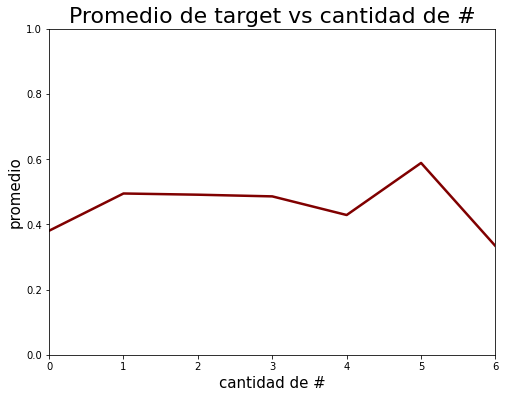

In [158]:
cantidad_hashtags.columns = ["promedio de target","cantidad"]
cantidad_hashtags = cantidad_hashtags[(cantidad_hashtags['cantidad']>10)]
cantidad_hashtags['promedio de target'].plot(figsize=(8, 6), linewidth=2.5, color='maroon')
plt.xlabel("cantidad de #", size=15)
plt.ylabel("promedio", size=15)
plt.ylim(0,1)
plt.title("Promedio de target vs cantidad de #", fontsize=22)

In [159]:
caracteres_inusuales['cantiad de !'] = caracteres_inusuales['text'].str.count('!')
cantidad_exclamaciones = caracteres_inusuales.groupby('cantiad de !').agg({'target':['mean','count']})
cantidad_exclamaciones.head()

target      
                  mean count
cantiad de !                
0             0.421738  6293
1             0.269978  463 
2             0.266667  135 
3             0.211538  52  
4             0.200000  20

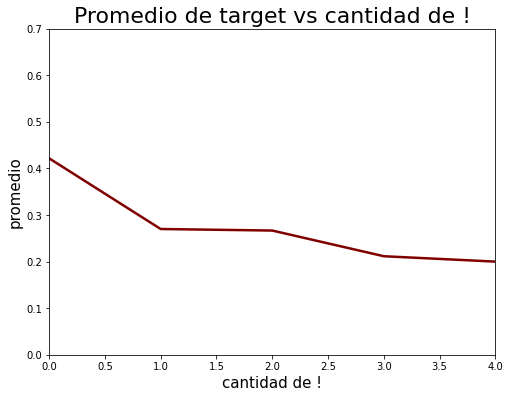

In [160]:
cantidad_exclamaciones.columns = ["promedio de target","cantidad"]
cantidad_exclamaciones = cantidad_exclamaciones[(cantidad_exclamaciones['cantidad']>10)]
cantidad_exclamaciones['promedio de target'].plot(figsize=(8, 6), linewidth=2.5, color='maroon')
plt.xlabel("cantidad de !", size=15)
plt.ylabel("promedio", size=15)
plt.ylim(0,0.7)
plt.title("Promedio de target vs cantidad de !", fontsize=22);

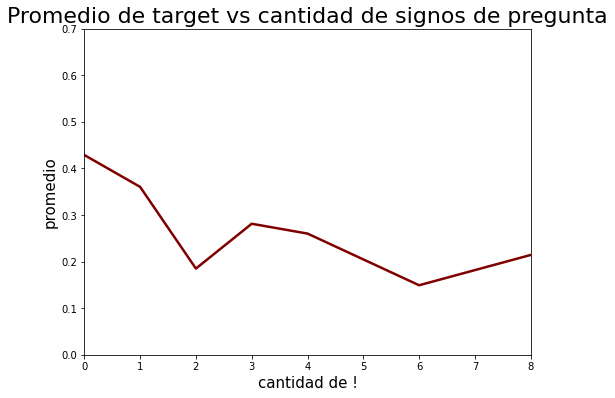

In [162]:
caracteres_inusuales['signos de pregunta'] = caracteres_inusuales['text'].str.count('\?')
cantidad_preguntas = caracteres_inusuales.groupby('signos de pregunta').agg({'target':['mean','count']})
cantidad_preguntas.columns = ["promedio de target","cantidad"]
cantidad_preguntas = cantidad_preguntas[(cantidad_preguntas['cantidad']>20)]


cantidad_preguntas['promedio de target'].plot(figsize=(8, 6), linewidth=2.5, color='maroon')
plt.xlabel("cantidad de !", size=15)
plt.ylabel("promedio", size=15)
plt.ylim(0,0.7)
plt.title("Promedio de target vs cantidad de signos de pregunta", fontsize=22);

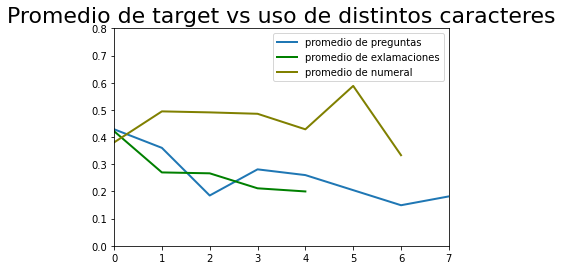

In [163]:
#No voy a usar este plot al final
plt.plot(cantidad_preguntas.index , 'promedio de target', data=cantidad_preguntas, markerfacecolor='blue', markersize=12, linewidth=2,label="promedio de preguntas")
plt.plot( cantidad_exclamaciones.index, 'promedio de target', data=cantidad_exclamaciones, marker='', color='green', linewidth=2,label="promedio de exlamaciones")
plt.plot( cantidad_hashtags.index, 'promedio de target', data=cantidad_hashtags, marker='', color='olive', linewidth=2, label="promedio de numeral")
plt.title("Promedio de target vs uso de distintos caracteres",size=22)
plt.xlim(0,7)
plt.ylim(0,0.8)
plt.legend()

In [92]:
caracteres_inusuales['cantiad de ['] = caracteres_inusuales['text'].str.count('\[')
caracteres_inusuales.groupby('cantiad de [').agg({'target':['mean','count']})

target      
                  mean count
cantiad de [                
0             0.405413  6909
1             0.470588  68  
2             0.625000  8   
3             1.000000  2   
4             0.000000  1   
6             1.000000  1

In [93]:
caracteres_inusuales['cantiad de +'] = caracteres_inusuales['text'].str.count('\+')
caracteres_inusuales.groupby('cantiad de +').agg({'target':['mean','count']})

target      
                  mean count
cantiad de +                
0             0.407519  6942
1             0.257143  35  
2             0.222222  9   
5             0.000000  1   
6             0.000000  1   
10            1.000000  1

In [94]:
caracteres_inusuales['cantiad de *'] = caracteres_inusuales['text'].str.count('\*')
caracteres_inusuales.groupby('cantiad de *').agg({'target':['mean','count']})

target      
                  mean count
cantiad de *                
0             0.407782  6913
1             0.357143  14  
2             0.181818  44  
3             0.333333  3   
4             0.538462  13  
6             0.500000  2

In [95]:
caracteres_inusuales['cantiad de ¢'] = caracteres_inusuales['text'].str.count('\¢')
caracteres_inusuales.groupby('cantiad de ¢').agg({'target':['mean','count']})

target      
                  mean count
cantiad de ¢                
0             0.406474  6982
1             0.750000  4   
2             0.000000  3

In [96]:
caracteres_inusuales['cantiad de $'] = caracteres_inusuales['text'].str.count('\$')
caracteres_inusuales.groupby('cantiad de $').agg({'target':['mean','count']})

target      
                  mean count
cantiad de $                
0             0.406992  6951
1             0.342857  35  
2             0.000000  1   
3             0.000000  1   
4             0.000000  1

In [97]:
caracteres_inusuales['cantiad de %'] = caracteres_inusuales['text'].str.count('\%')
caracteres_inusuales.groupby('cantiad de %').agg({'target':['mean','count']})

target      
                  mean count
cantiad de %                
0             0.405499  6947
1             0.564103  39  
2             0.666667  3

In [98]:
caracteres_inusuales['cantiad de Â'] = caracteres_inusuales['text'].str.count('\Â')
caracteres_inusuales.groupby('cantiad de Â').agg({'target':['mean','count']})

target      
                  mean count
cantiad de Â                
0             0.397624  6398
1             0.714286  7   
2             0.546326  313 
3             0.463768  138 
4             0.466667  15  
5             0.437500  16  
6             0.433333  60  
7             0.000000  2   
8             0.583333  12  
9             0.400000  15  
10            0.000000  2   
11            0.250000  4   
12            0.666667  3   
14            0.000000  1   
15            0.500000  2   
18            0.000000  1

In [99]:
caracteres_inusuales['cantiad de |'] = caracteres_inusuales['text'].str.count('\|')
caracteres_inusuales.groupby('cantiad de |').agg({'target':['mean','count']})

target      
                  mean count
cantiad de |                
0             0.405801  6895
1             0.480519  77  
2             0.500000  8   
3             0.250000  8   
5             0.000000  1

In [100]:
caracteres_inusuales['cantiad de °'] = caracteres_inusuales['text'].str.count('\°')
caracteres_inusuales.groupby('cantiad de °').agg({'target':['mean','count']})

target      
                  mean count
cantiad de °                
0             0.406496  6989

## Para el caso de los signos de exclamacion, se cumple que su precencia le quita credibilidad al tweet, y lo mismo para los signos de pregunta,mientras que para los #,no hay ningnuna relacion, para los demás casos, se presentan tan pocas veces que no vale la pena su estudio

## Si hay mayor cantidad,en promedio, de mayusculas en un tweet,es menos fiable?

In [24]:
train_limpio = pd.read_csv("data/train_limpio.csv",encoding = "ISO-8859-1")

## Promedio de mayúsculas

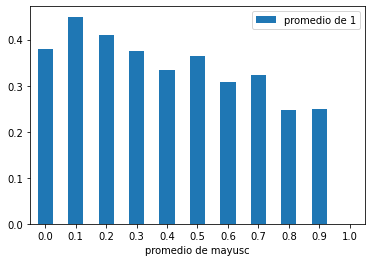

In [10]:
estudio_de_mayúsculas = train_limpio
estudio_de_mayúsculas['promedio de mayusculas'] = estudio_de_mayúsculas['text'].str.count(r'[A-Z]')/estudio_de_mayúsculas['text'].str.len() 
estudio_de_mayúsculas['promedio de mayusculas'] = estudio_de_mayúsculas['promedio de mayusculas'].round(decimals=1)
promedio_mayusc = estudio_de_mayúsculas.groupby('promedio de mayusculas').agg({'target':['mean','count']}).reset_index()
promedio_mayusc.columns = ['promedio de mayusc','promedio de 1','cantidad']
ax = promedio_mayusc.plot.bar(x='promedio de mayusc', y='promedio de 1', rot=0)

## Mayúsculas por letra

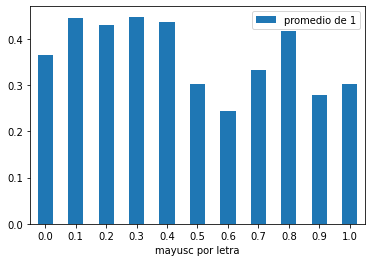

In [9]:
estudio_de_mayúsculas['mayusculas por letra'] = estudio_de_mayúsculas['text'].str.count(r'[A-Z]')/(train_limpio['text'].str.count(r'[A-Z]')+train_limpio['text'].str.count(r'[a-z]'))
estudio_de_mayúsculas['mayusculas por letra'] = estudio_de_mayúsculas['mayusculas por letra'].round(decimals=1)
mayusc_por_letra = estudio_de_mayúsculas.groupby('mayusculas por letra').agg({'target':['mean','count']}).reset_index()
mayusc_por_letra.columns = ['mayusc por letra','promedio de 1','cantidad']
ax = mayusc_por_letra.plot.bar(x='mayusc por letra', y='promedio de 1', rot=0)

## Mayusculas por palabra

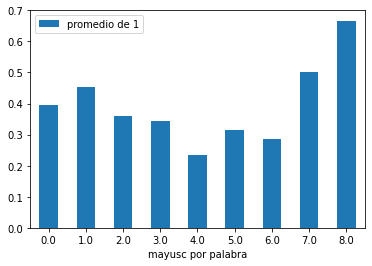

In [8]:
estudio_de_mayúsculas['mayusculas por palabra'] = estudio_de_mayúsculas['text'].str.count(r'[A-Z]')/train_limpio['text'].str.split(' ').map(len)
estudio_de_mayúsculas['mayusculas por palabra'] = estudio_de_mayúsculas['mayusculas por palabra'].round(decimals=0)
mayusc_por_palabra = estudio_de_mayúsculas.groupby('mayusculas por palabra').agg({'target':['mean','count']}).reset_index()
mayusc_por_palabra.columns = ['mayusc por palabra','promedio de 1','cantidad']
ax = mayusc_por_palabra.plot.bar(x='mayusc por palabra', y='promedio de 1', rot=0)

## Cantidad de mayúsculas

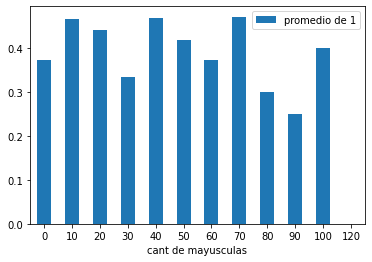

In [11]:
estudio_de_mayúsculas['cantidad de mayusculas'] = estudio_de_mayúsculas['text'].str.count(r'[A-Z]')
estudio_de_mayúsculas['cantidad de mayusculas'] = estudio_de_mayúsculas['cantidad de mayusculas'].round(decimals=-1)
cant_mayusc = estudio_de_mayúsculas.groupby('cantidad de mayusculas').agg({'target':['mean','count']}).reset_index()
cant_mayusc.columns = ['cant de mayusculas','promedio de 1','cantidad']
ax = cant_mayusc.plot.bar(x='cant de mayusculas', y='promedio de 1', rot=0)

## El único caso en el que se pudo ver una, minima,relacion, es en el promedio de mayusculas por longitud de tweet

## Acá no se ve ninguna relacion, en el otro si

# Graficos de barra básicos.

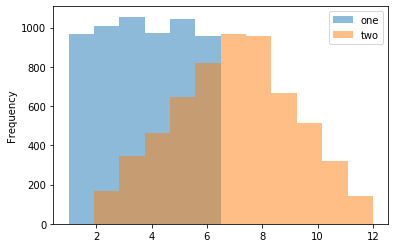

In [255]:
df = pd.DataFrame(

    np.random.randint(1, 7, 6000),

    columns = ['one'])

df['two'] = df['one'] + np.random.randint(1, 7, 6000)

ax = df.plot.hist(bins=12, alpha=0.5)

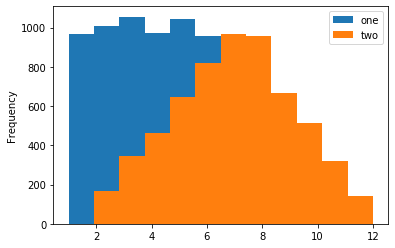

In [258]:
ax = df.plot.hist(bins=12, alpha=1)

## Si tienen una coma en el location

In [12]:
location_con_comas = train_limpio[~train_limpio['location'].isnull()]
location_con_comas = location_con_comas[location_con_comas['location'].str.contains(',')]
location_con_comas.head()

,id,keyword,location,text,target,promedio de mayusculas,mayusculas por letra,mayusculas por palabra,cantidad de mayusculas
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,0.1,0.1,0.0,0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE,0,0.6,0.8,3.0,30
46,66,ablaze,"GREENSBORO,NORTH CAROLINA",How the West was burned: Thousands of wildfires ablaze in California alone,1,0.1,0.1,0.0,0
49,73,ablaze,"Sheffield Township, Ohio",Deputies: Man shot before Brighton home set ablaze,1,0.1,0.1,0.0,0
56,81,ablaze,"Sao Paulo, Brazil",Set our hearts ablaze and every city was a gift And every skyline was like a kiss upon the lips @ÃÂÃÂ_,0,0.0,0.0,0.0,0


In [13]:
location_con_comas.target.mean()

0.4375356531660011

# Hay que creerle si el tweet tiene URL? (para éste analisis se usa el train sin limpiar)

In [35]:
tweets_por_url = train

In [36]:
tweets_por_url['tiene URL'] = (tweets_por_url['text'].str.contains('http') | tweets_por_url['text'].str.contains('www'))

In [12]:
tweets_por_url = tweets_por_url.groupby('tiene URL').agg({'target':['mean','count']})
tweets_por_url.columns = ('promedio target','cantidad')
tweets_por_url.index=('Con URL','Sin URL')
#tweets_por_url = tweets_por_url.reset_index()
tweets_por_url

,promedio target,cantidad
Con URL,0.301622,3637
Sin URL,0.546781,3976


Text(0.9217806841046278, 0.5517806841046278, '3976')

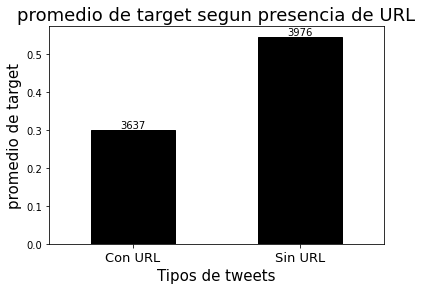

In [33]:
labels = tweets_por_url['cantidad']
tweets_por_url['promedio target'].plot(kind="bar", stacked=True,edgecolor = "black",color="black",figsize=(6,4))
ax=plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, size = 13)
ax.set_title('promedio de target segun presencia de URL',size=18)
ax.set_xlabel('Tipos de tweets',size=15)
ax.set_ylabel('promedio de target',size=15)
ax.annotate(tweets_por_url.loc['Con URL',('cantidad')], (tweets_por_url.loc['Con URL',('promedio target')]-3/8, tweets_por_url.loc['Con URL',('promedio target')]+0.005))
ax.annotate(tweets_por_url.loc['Sin URL',('cantidad')], (tweets_por_url.loc['Sin URL',('promedio target')]+3/8, tweets_por_url.loc['Sin URL',('promedio target')]+0.005))

In [37]:
tweets_por_url

,id,keyword,location,text,target,tiene URL
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,False
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,False
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,False
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1,False
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,False
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires,1,False
6,10,NaN,NaN,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",1,False
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in the woods...,1,False
8,14,NaN,NaN,There's an emergency evacuation happening now in the building across the street,1,False
9,15,NaN,NaN,I'm afraid that the tornado is coming to our area...,1,False


# Tweets por longitud

In [45]:
tweets_por_longitud = train_limpio

In [46]:
tweets_por_longitud['longitud tweet'] = tweets_por_longitud['text'].str.len()
tweets_por_longitud['longitud tweet'] = ((tweets_por_longitud['longitud tweet']/10).round(0).astype('int64'))*10
longitudes_agrupadas = tweets_por_longitud.groupby('longitud tweet').agg({'target':['count','mean']})
longitudes_agrupadas.columns = ['cantidad tweets','proporcion de 1']
longitudes_agrupadas['proporcion de 0'] = 1-longitudes_agrupadas['proporcion de 1']

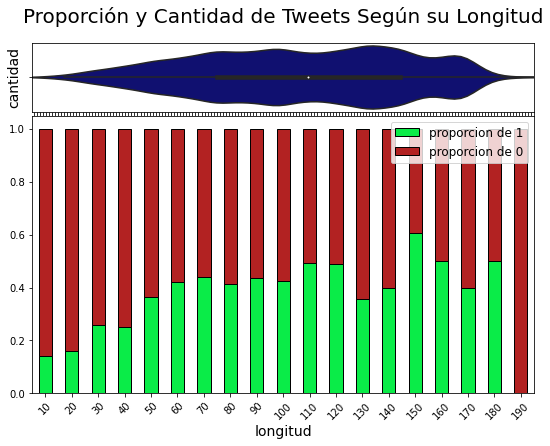

In [50]:
f, (ax_viol, ax_bar) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.2, .8)})
#colores
color_bar = ["#0aec48", "firebrick"]
color_violin = "navy"
#título
ax_viol.set_title("Proporción y Cantidad de Tweets Según su Longitud", size = 20, pad=20)
# asigno gráficos
sns.violinplot(tweets_por_longitud["longitud tweet"], ax=ax_viol, color = color_violin,pad=8.0,figsize=(8,6))
longitudes_agrupadas[["proporcion de 1", "proporcion de 0"]].plot(kind="bar", stacked=True,ax=ax_bar, color=color_bar,edgecolor = "black",figsize=(8,6))
#ajustes
plt.legend(loc=1, prop={'size': 12})
ax_bar.set_xticklabels(ax_bar.get_xticklabels(), rotation=45)
#rango de valores
ax_viol.set_xticks(range(0,165))
# Labels
ax_viol.set_ylabel("cantidad",fontsize=14)
ax_bar.set_xlabel("longitud",fontsize=14)
#distancia nula entre los dos graficos
f.tight_layout(pad=0)